In [20]:
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
import seaborn as sns
p1 = Path.cwd() / 'back_data'

In [7]:
fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
fueleco.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_12640\3919698033.py:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
c:\Users\admin\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\Users\admin\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\Users\admin\anaconda3\lib\site-packag

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0


In [8]:
# info() 메서드에 memory_usage='deep' 인자를 전달하여 메모리 사용량 확인 가능
fueleco[['city08', 'comb08']].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int64
 1   comb08  39101 non-null  int64
dtypes: int64(2)
memory usage: 611.1 KB


In [6]:
(fueleco[['city08', 'comb08']]
# city08과 comb08을 int16으로 변환한 후
.assign(city08=fueleco['city08'].astype('int16'))
.assign(comb08=fueleco['comb08'].astype('int16'))
# info(memory_usage='deep')을 통해 메모리 사용량 확인
.info(memory_usage='deep')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int16
 1   comb08  39101 non-null  int16
dtypes: int16(2)
memory usage: 152.9 KB


In [9]:
# 카디널리티가 낮은 object 형식의 경우 category로 변경하여 메모리 절약
# groupby 활용 시 observed=True 인자 전달 필요
fueleco_describe = fueleco.describe(include='object').T
low_cardi = (fueleco_describe[(fueleco_describe['unique'] / fueleco_describe['count']).le(0.01)]
.index.tolist()
)
(fueleco[low_cardi].head()
.dropna(how='any', axis=1)
)

,drive,fuelType,fuelType1,make,mpgData,trany,VClass
0,Rear-Wheel Drive,Regular,Regular Gasoline,Alfa Romeo,Y,Manual 5-spd,Two Seaters
1,Rear-Wheel Drive,Regular,Regular Gasoline,Ferrari,N,Manual 5-spd,Two Seaters
2,Front-Wheel Drive,Regular,Regular Gasoline,Dodge,Y,Manual 5-spd,Subcompact Cars
3,Rear-Wheel Drive,Regular,Regular Gasoline,Dodge,N,Automatic 3-spd,Vans
4,4-Wheel or All-Wheel Drive,Premium,Premium Gasoline,Subaru,N,Manual 5-spd,Compact Cars


In [12]:
fueleco['drive'].isna().sum(), fueleco['drive'].isna().mean() * 100

(1189, 3.0408429451932175)

In [19]:
# value_counts() 메서드에서 dropna=False 인자 전달하여 NaN 확인도 가능
top_n = fueleco['make'].value_counts().index[:6]
(fueleco
# 'make'열을 assign으로 변환 -> where 메서드를 통해 top_n에 들어있으면 그 값을, 아니면 Other로 지정
.assign(make=fueleco['make'].where(fueleco['make'].isin(top_n), 'Other'))
['make'].value_counts()
)

Other        23211
Chevrolet     3900
Ford          3208
Dodge         2557
GMC           2442
Toyota        1976
BMW           1807
Name: make, dtype: int64

<AxesSubplot:xlabel='make', ylabel='count'>

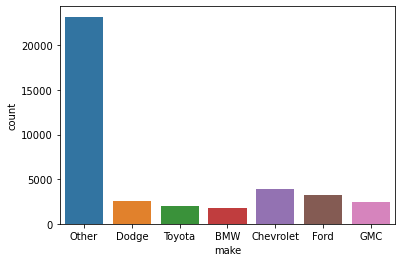

In [21]:
# seaborn을 활용해 시각화 -> countplot() 함수의 data, x, y 파라미터 등
sns.countplot(data=fueleco.assign(make=fueleco['make'].where(fueleco['make'].isin(top_n), 'Other')), x='make')

<AxesSubplot:xlabel='make', ylabel='count'>

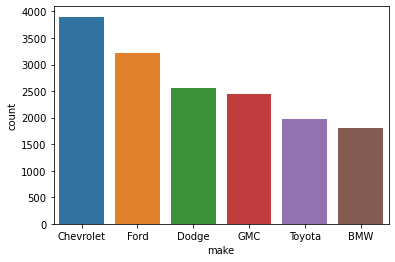

In [22]:
# countplot() 함수의 order 매개변수 활용도 가능
sns.countplot(data=fueleco, x='make', order=top_n)

In [36]:
# 원래 숫자를 넣으려고 했으나, '/', '-' 등으로 object 형식으로 지정된 케이스
fueleco['rangeA'].value_counts()
(fueleco['rangeA']
# str 속성의 extract() 메서드 활용하여 정규표현식으로 추출 -> ^(캐럿 기호)로 숫자가 아닌 값 추출
.str.extract(r'([^0-9.])')
.dropna()
.value_counts()
)

/    280
-     71
dtype: int64

In [51]:
(fueleco['rangeA']
# fillna()를 활용할 경우 그냥 fillna(0)은 안되고 꼭 fillna('0')이어야 함. 왜..?
.dropna()
# str 속성에서 '-'를 '/'로 바꾼 후
.str.replace('-', '/')
# '/'를 기점으로 split 진행
.str.split('/', expand=True)
# split 결과 NaN이 생기므로 float으로 형변환을 해줘야
.astype('float')
.mean(axis=1)
# pipe() 메서드를 활용해 해당 내용을 pd.qcut() 함수로 구간 구분
.pipe(lambda ser: pd.qcut(ser, 10))
.value_counts(sort=False)
)

(8.999, 240.0]    156
(240.0, 270.0]    188
(270.0, 280.0]    145
(280.0, 290.0]    118
(290.0, 307.0]    152
(307.0, 320.0]    162
(320.0, 333.8]    118
(333.8, 354.0]    150
(354.0, 389.6]    147
(389.6, 449.5]    149
dtype: int64

In [52]:
# city08 열의 통계량 확인 -> max가 높은 오른쪽으로 꼬리가 긴 형태를 보임
# clip() 메서드를 활용해 조정 가능 -> lower, upper 파라미터 사용
# 혹은 히스토그램을 그린다면 range 파라미터 활용 가능 + 계급구간을 상세히 하기 위해 bin 파라미터 활용도 가능
fueleco['city08'].describe()

count    39101.000000
mean        18.077799
std          6.970672
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

In [55]:
mask = fueleco['make'].isin(['Ford', 'Honda', 'Tesla', 'BMW'])
(fueleco[mask]
# make열을 그룹화하여 city08열의 평균과 표준편차 확인
.groupby('make')['city08']
.agg(['mean', 'std'])
)

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


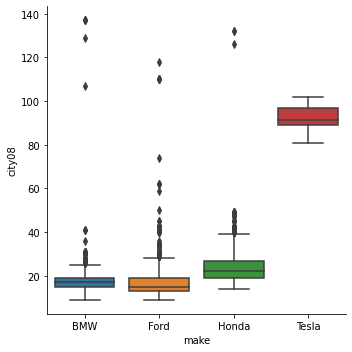

In [58]:
# seaborn의 catplot 함수는 axes 단계가 아닌 figure 단계에서 작동
# kind='' 인자를 전달하여 그래프의 종류 결정
# boxplot의 단점은 제조사의 샘플 개수를 나타내지 않는 것 -> boxplot 위에 swarmplot을 그림으로써 보완 가능(but 시간이 오래 걸림)
g = sns.catplot(data=fueleco[mask], x='make', y='city08', kind='box')

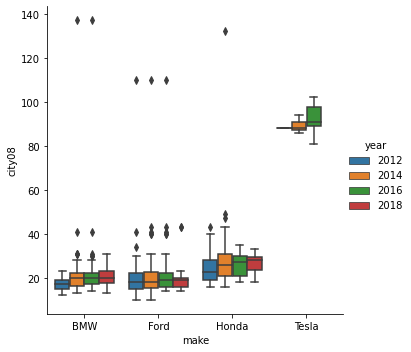

In [59]:
# seaborn의 경우 col 파라미터와 hue 파라미터 활용 가능
# col, col_order, col_wrap, hue, hue_order 파라미터 등
g = sns.catplot(data=fueleco[mask], x='make', y='city08', hue='year', hue_order=[2012, 2014, 2016, 2018], kind='box')